In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# For regular expressions
import re
import string
import math

In [ ]:
!ls

drive  sample_data


# Data Loading

In [ ]:
path = '/content/drive/MyDrive/Colab_Notebooks/behaviour_simulation_train.csv'

In [ ]:
path_photos = '/content/drive/MyDrive/behaviour_simulation_train.csv'

In [ ]:
df = pd.read_csv(path_photos)
df

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
...,...,...,...,...,...,...,...
299995,299996,2019-09-07 16:18:10,0,Barcelona Star Expected To Return Against Vale...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
299996,299997,2018-02-23 11:24:36,46,Kjeld Nuis of #NED is golden again... This tim...,CBCOlympics,[Video(thumbnailUrl='https://pbs.twimg.com/med...,cbc
299997,299998,2020-11-11 20:18:15,261,Grateful 🙌🏾 to have <mention> officially join ...,TeamCoachBuzz,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
299998,299999,2019-10-29 10:44:00,119,The US Air Force's mysterious space plane just...,Independent,[Video(thumbnailUrl='https://pbs.twimg.com/med...,independent


In [ ]:
df.shape

(300000, 7)

In [ ]:
df.columns

Index(['id', 'date', 'likes', 'content', 'username', 'media',
       'inferred company'],
      dtype='object')

In [ ]:
print(df.describe(), "\n","\n")


                  id          likes
count  300000.000000  300000.000000
mean   150000.500000     773.364793
std     86602.684716    4931.463419
min         1.000000       0.000000
25%     75000.750000       3.000000
50%    150000.500000      76.000000
75%    225000.250000     364.000000
max    300000.000000  560193.000000 
 



In [ ]:
print(df.info(), "\n", "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                300000 non-null  int64 
 1   date              300000 non-null  object
 2   likes             300000 non-null  int64 
 3   content           300000 non-null  object
 4   username          300000 non-null  object
 5   media             300000 non-null  object
 6   inferred company  300000 non-null  object
dtypes: int64(2), object(5)
memory usage: 16.0+ MB
None 
 



# Preprocess

#### Missing Vales

In [ ]:
df.isnull().sum()

id                  0
date                0
likes               0
content             0
username            0
media               0
inferred company    0
dtype: int64

In [ ]:
df.head(3)

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc


### Numeric data analysis

In [ ]:
df.likes.describe()

count    300000.000000
mean        773.364793
std        4931.463419
min           0.000000
25%           3.000000
50%          76.000000
75%         364.000000
max      560193.000000
Name: likes, dtype: float64

In [ ]:
df['username'].value_counts()

IndependentNGR     32295
CNN                13954
EuroLeague          6226
AMCTheatres         5114
hkfp                4269
                   ...  
BlackShellMedia        1
feraldata              1
MS_ITProCA             1
COTYInc                1
GDLMetro               1
Name: username, Length: 2449, dtype: int64

In [ ]:
df['inferred company'].value_counts()

independent     39248
cnn             23768
cisco           19309
cbc             15579
free            13456
                ...  
nn                  2
henry schein        2
singtel             1
midea               1
talbots             1
Name: inferred company, Length: 220, dtype: int64

### Date and Time

In [ ]:
#separate columns for date, hour, month and day of the week
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df.date.dt.hour
df['month'] = df.date.dt.month
df['day of week'] = df.date.dt.day_name()
df['Year'] = df.date.dt.year

In [ ]:
df.head()

,id,date,likes,content,username,media,inferred company,hour,month,day of week,Year
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,0,12,Saturday,2020
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,10,6,Saturday,2018
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,19,9,Tuesday,2020
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,11,10,Thursday,2020
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,14,10,Friday,2018


In [ ]:
df.groupby(['day of week'])['likes'].agg([np.mean,np.median]).sort_values(by='mean', ascending = False)

,mean,median
day of week,,
Sunday,889.722638,104.0
Friday,819.962135,73.0
Saturday,808.732334,90.0
Monday,786.961849,75.0
Wednesday,751.079858,72.0
Tuesday,730.967729,69.0
Thursday,675.117651,69.0


In [ ]:
df.groupby(['inferred company'])['likes'].agg([np.mean,np.median]).sort_values(by='mean',ascending=False)

,mean,median
inferred company,,
fc barcelona,28486.750430,22976.0
stryker,18076.571429,3467.0
tesla,17794.014085,15147.0
gucci,14273.000000,6212.5
spotify,13793.822006,4535.0
...,...,...
office depot,4.180000,3.5
arm,3.734342,1.0
united rentals,3.310850,1.0


In [ ]:
df.groupby(['hour'])['likes'].agg([np.mean,np.median]).sort_values(by='mean',ascending = False)

,mean,median
hour,,
4,1215.580000,174.0
0,1099.697168,102.0
1,1088.395962,112.0
3,1053.215743,126.0
2,1039.100985,123.0
22,926.207576,90.0
5,901.844032,131.0
21,840.300510,81.0
23,824.603847,52.0


<BarContainer object of 24 artists>

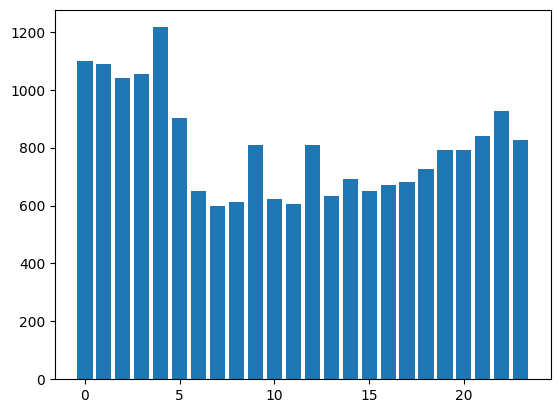

In [ ]:
x=df.groupby(['hour'])['likes'].agg([np.mean,np.median]).sort_values(by='mean',ascending = False)
plt.bar(x.index,x['mean'].values)

<BarContainer object of 7 artists>

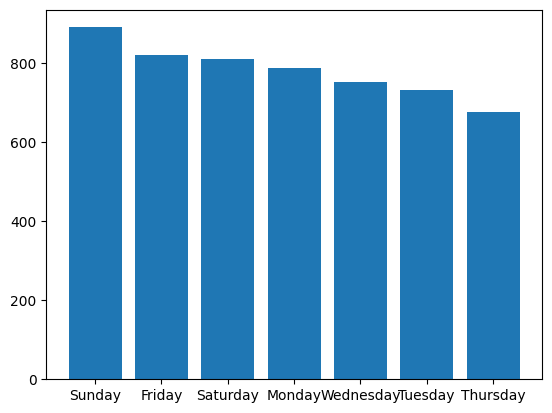

In [ ]:
x=df.groupby(['day of week'])['likes'].agg([np.mean,np.median]).sort_values(by='mean',ascending = False)
plt.bar(x.index,x['mean'].values)

### Character frequency analysis

In [ ]:
df['content'].str.len().describe()

count    300000.000000
mean        147.524697
std          71.517556
min          20.000000
25%          88.000000
50%         136.000000
75%         201.000000
max         540.000000
Name: content, dtype: float64

<Axes: >

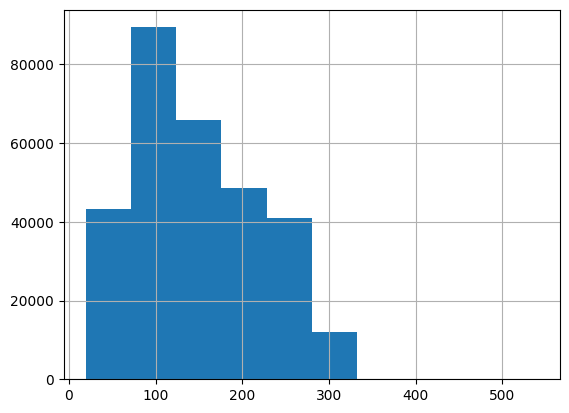

In [ ]:
df['content'].str.len().hist()

<Axes: >

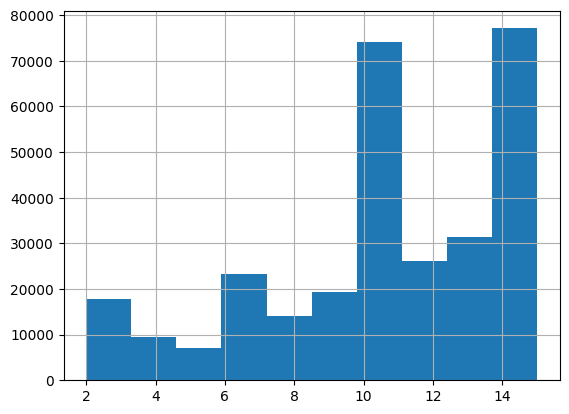

In [ ]:
df['username'].str.len().hist()

<Axes: >

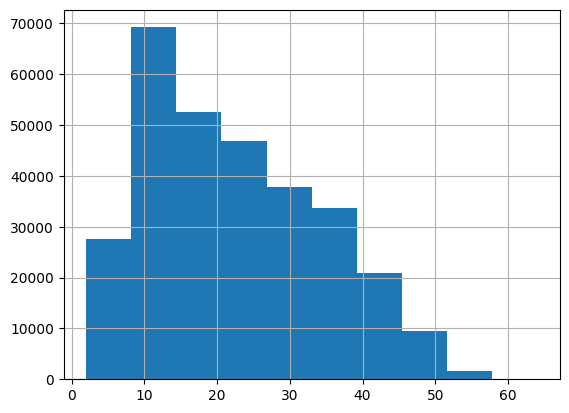

In [ ]:
df['content'].str.split().map(lambda x: len(x)).hist()

### Content Column

In [ ]:
import re

loading the data using pandas

In [ ]:
path2 = '/content/drive/MyDrive/INTER_IIT/content_simulation_train.xlsx'
df2 = pd.read_excel(path2)

making content lower-case


In [ ]:
df2['content_processed'] = df2['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
df2.head(1)

,id,date,likes,content,username,media,inferred company,hour,month,day of week,Year,content_processed
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,0,12,Saturday,2020,"spend your weekend morning with a ham, egg, an..."


Punctuations removal, removing stop-words, lemmatization

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

In [ ]:
import nltk.corpus
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
stop_words_appended = ['hyperlink', 'mention', '<mention>','<hyperlink>']
stop_words = stopwords.words('english')
for words in stop_words_appended:
  stop_words.append(words)

In [ ]:
stop_words

In [ ]:
#library that contains punctuation
import string
string.punctuation
def remove_special_characters(text):
  return re.sub(r'[^\w\s]','',text)

In [ ]:
df2['content_processed_without_stopwords']= df2['content_processed'].apply(lambda x:remove_special_characters(x))
# df2['content_processed_stopwords_punc']= df2['content_processed_stopwords_punc'].apply(lambda x:remove_punctuation(x))
df2.head(2)

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def remove_stop(x):
  return " ".join(wordnet_lemmatizer.lemmatize(word) for word in str(x).split() if word not in stop_words)

def remove_stop_nolemmatize(x):
  return " ".join(word for word in str(x).split() if word not in stop_words)
df2['content_processed_without_stopwords_No_Lemmatize'] = df2['content_processed_without_stopwords'].apply(lambda x : remove_stop_nolemmatize(x))
df2['content_processed_without_stopwords'] = df2['content_processed_without_stopwords'].apply(lambda x : remove_stop (x))
df2

In [ ]:
df2.head(2)

#### Media and Date/Time Column


In [ ]:
import pandas as pd
import re

def extract_link_and_media_type(df, column_name):
    # Regular expression patterns to extract URLs and media type
    url_pattern = r'https://[^\']+'
    media_type_pattern = r'\[([^(\s]+)\('

    # Function to apply to each cell in the specified column
    def extract_info(cell):
        urls = re.findall(url_pattern, cell)
        media_type_match = re.search(media_type_pattern, cell)
        media_type = media_type_match.group(1) if media_type_match else "Media type not found"
        return pd.Series({'Link': urls[0] if urls else "Link not found", 'Media Type': media_type})

    # Apply the function to the specified column
    result_df = df[column_name].apply(extract_info)

    # Combine the result with the original DataFrame
    df_result = pd.concat([df, result_df], axis=1)

    return df_result



# Extract link and media type
result_df = extract_link_and_media_type(df2, 'media')
print(result_df)


            id                 date  likes  \
0            1  2020-12-12 00:47:00      1   
1            2  2018-06-30 10:04:20   2750   
2            3  2020-09-29 19:47:28     57   
3            4  2020-10-01 11:40:09    152   
4            5  2018-10-19 14:30:46     41   
...        ...                  ...    ...   
299995  299996  2019-09-07 16:18:10      0   
299996  299997  2018-02-23 11:24:36     46   
299997  299998  2020-11-11 20:18:15    261   
299998  299999  2019-10-29 10:44:00    119   
299999  300000  2018-08-26 01:19:09    714   

                                                  content        username  \
0       Spend your weekend morning with a Ham, Egg, an...    TimHortonsPH   
1       Watch rapper <mention> freestyle for over an H...       IndyMusic   
2       Canadian Armenian community demands ban on mil...       CBCCanada   
3       1st in Europe to be devastated by COVID-19, It...  MKWilliamsRome   
4       Congratulations to Pauletha Butts of <mention>...     

In [ ]:

display(result_df)

,id,date,likes,content,username,media,inferred company,Link,Media Type
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?fo...,Photo
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?fo...,Photo
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?fo...,Photo
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?fo...,Photo
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,https://pbs.twimg.com/media/Dp4L0cSUcAAh9JG?fo...,Photo
...,...,...,...,...,...,...,...,...,...
299995,299996,2019-09-07 16:18:10,0,Barcelona Star Expected To Return Against Vale...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,https://pbs.twimg.com/media/ED397wUUYAEOV4K?fo...,Photo
299996,299997,2018-02-23 11:24:36,46,Kjeld Nuis of #NED is golden again... This tim...,CBCOlympics,[Video(thumbnailUrl='https://pbs.twimg.com/med...,cbc,https://pbs.twimg.com/media/DWt21i8VMAE69_F.jpg,Video
299997,299998,2020-11-11 20:18:15,261,Grateful 🙌🏾 to have <mention> officially join ...,TeamCoachBuzz,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,https://pbs.twimg.com/media/EmkaGpzXIAEyHg8?fo...,Photo
299998,299999,2019-10-29 10:44:00,119,The US Air Force's mysterious space plane just...,Independent,[Video(thumbnailUrl='https://pbs.twimg.com/med...,independent,https://pbs.twimg.com/media/EICgLEQWwAIt3Qr.jpg,Video


#### Stopwords

In [ ]:
import nltk.corpus
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]
new= df['content'].str.split()
new=new.values.tolist()
corpus=[word.lower() for i in new for word in i]

In [ ]:
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 10 artists>

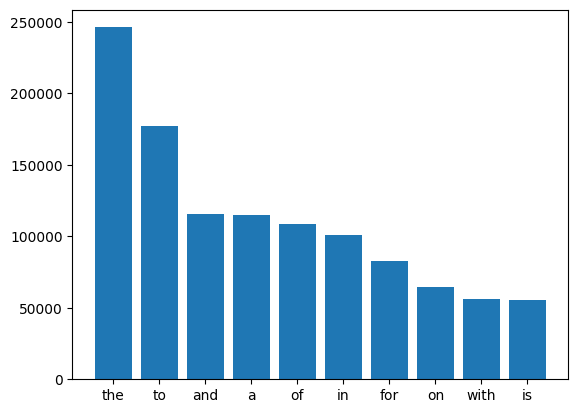

In [ ]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)

<Axes: >

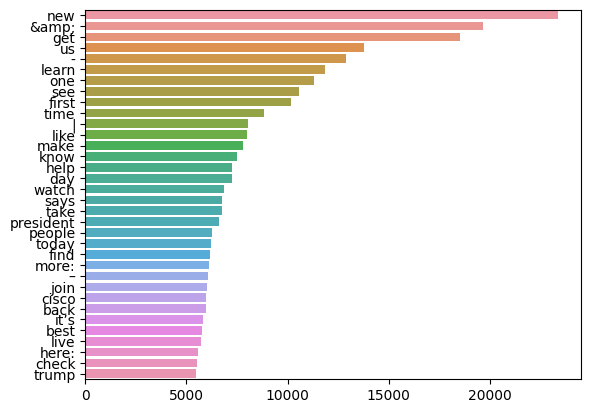

In [ ]:
import seaborn as sns
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
stop_links = ['<hyperlink>', '<mention>', '<mention>,']
x, y= [], []
for word,count in most[:100]:
    if (word not in stop) and (word not in stop_links):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

#### N Grams

In [ ]:
!python -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def _get_top_ngram(corpus, n=None):
    """
    Extract the top n-grams from a given corpus.

    Args:
    - corpus (list): List of text documents.
    - n (int): Size of n-grams to extract (default is None).

    Returns:
    - words_freq (list): List of tuples containing n-gram and its frequency, sorted by frequency in descending order.
    """
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:10]

def plot_top_ngrams_barchart(text, n=2):
    """
    Plot a bar chart of the top n-grams in the given text.

    Args:
    - text (list): List of text documents.
    - n (int): Size of n-grams to extract (default is 2).

    Returns:
    - None
    """
    top_n_bigrams = _get_top_ngram(text, n)[:10]
    x, y = map(list, zip(*top_n_bigrams))
    sns.barplot(x=y, y=x)


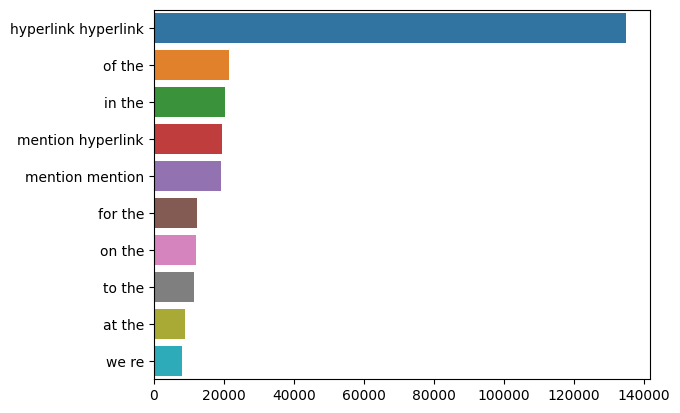

In [ ]:
plot_top_ngrams_barchart(df['content'],2)

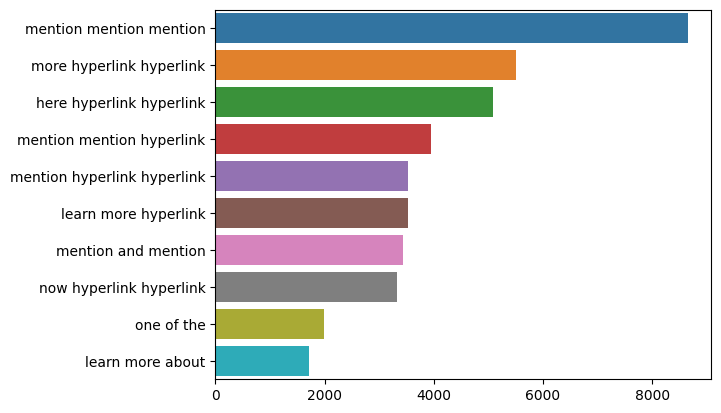

In [ ]:
plot_top_ngrams_barchart(df['content'],3)

#### WordCloud

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    """
    Generate and plot a word cloud from the given text.

    Args:
    - text (list): List of text documents.

    Returns:
    - None
    """
    # Download stopwords if not already downloaded
    nltk.download('stopwords')

    # Define additional stopwords related to links (stop_links)
    stop_links = set(['http', 'https', 'www'])

    # Define a set of common English stopwords
    stop = set(stopwords.words('english'))

    def _preprocess_text(text):
        """
        Preprocess the text data for word cloud generation.

        Args:
        - text (list): List of text documents.

        Returns:
        - corpus (list): List of preprocessed words for each document in the text.
        """
        corpus = []
        stem = PorterStemmer()
        lem = WordNetLemmatizer()

        for news in text:
            # Tokenize and preprocess words
            words = [w.lower() for w in word_tokenize(news) if ((w.lower() not in stop) and (w.lower() not in stop_links))]
            words = [lem.lemmatize(w) for w in words if len(w) > 2]

            corpus.append(words)
        return corpus

    # Preprocess the input text
    corpus = _preprocess_text(text)

    # Generate and configure WordCloud object
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1
    )

    # Generate word cloud from the preprocessed corpus
    wordcloud = wordcloud.generate(str(corpus))

    # Plot the word cloud
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

# Example Usage
text_data = ["This is an example sentence.", "Another example sentence with some words."]
plot_wordcloud(text_data)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


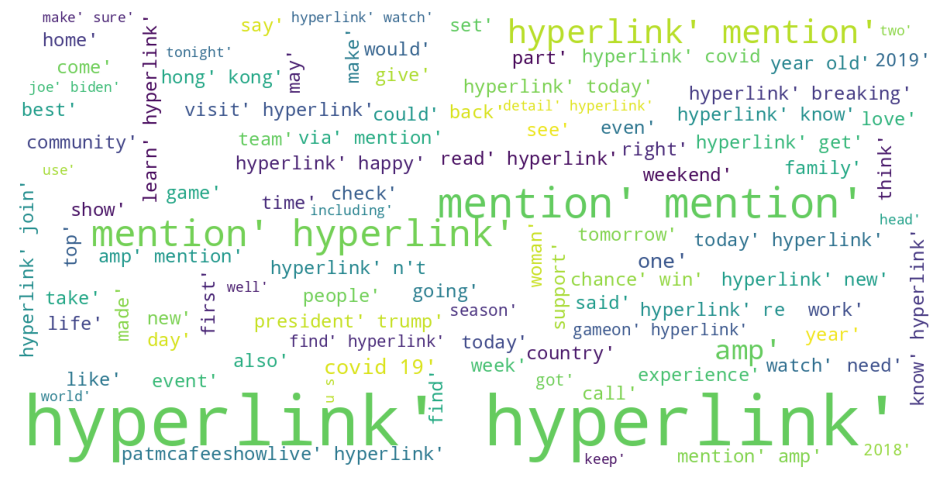

In [ ]:
plot_wordcloud(df['content'])

In [ ]:
df

,id,date,likes,content,username,media,inferred company,hour,month,day of week
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,0,12,Saturday
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,10,6,Saturday
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,19,9,Tuesday
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,11,10,Thursday
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,14,10,Friday
...,...,...,...,...,...,...,...,...,...,...
299995,299996,2019-09-07 16:18:10,0,Barcelona Star Expected To Return Against Vale...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,16,9,Saturday
299996,299997,2018-02-23 11:24:36,46,Kjeld Nuis of #NED is golden again... This tim...,CBCOlympics,[Video(thumbnailUrl='https://pbs.twimg.com/med...,cbc,11,2,Friday
299997,299998,2020-11-11 20:18:15,261,Grateful 🙌🏾 to have <mention> officially join ...,TeamCoachBuzz,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,20,11,Wednesday
299998,299999,2019-10-29 10:44:00,119,The US Air Force's mysterious space plane just...,Independent,[Video(thumbnailUrl='https://pbs.twimg.com/med...,independent,10,10,Tuesday


In [ ]:
df2

KeyboardInterrupt: ignored

#### USE for Embeddings

making encodings(ready to run just choose...
doubt-should encodings be made without removing stop words and stemming

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=dbbbc4904b2c4f003f8538b41fb8ccb7bd59bbbc8fecab425bd36e15d51e3a41
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


##### all-MiniLM-L6-v2

In [ ]:
sentences = result_df['content_processed_without_stopwords_No_Lemmatize']

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', device=device)

In [ ]:
embeddings_MiniLM_L6 = model.encode(sentences)
print(embeddings_MiniLM_L6)

[[-0.05536833  0.02315607  0.08311168 ... -0.01014662  0.04209841
  -0.10781458]
 [-0.04374205 -0.03123588  0.02096702 ...  0.01513423 -0.011517
  -0.15376778]
 [ 0.01234803  0.01605712 -0.01113654 ... -0.00494332  0.06863935
  -0.03064277]
 ...
 [-0.03898425 -0.04051608  0.04190487 ...  0.00487867 -0.05833462
  -0.0527997 ]
 [-0.03924062 -0.01487345  0.03585308 ... -0.09096027 -0.1263888
   0.07134979]
 [-0.04027722 -0.01701647 -0.03407202 ...  0.00764394 -0.01969278
  -0.00684876]]


In [ ]:
!pip install shutil

ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [ ]:
import numpy as np

# Convert to NumPy array
embeddings_array = np.array(embeddings_MiniLM_L6)

# Save to .npy file
np.savetxt('embeddings_MiniLM_L6.npy', embeddings_array)
import shutil

shutil.copyfile('embeddings_MiniLM_L6.npy', '/content/drive/MyDrive/Colab_Notebooks/embeddings_MiniLM_L6.npy')

'/content/drive/MyDrive/Colab_Notebooks/embeddings_MiniLM_L6.npy'

##### all-mpnet-base-v2

In [ ]:
from sentence_transformers import SentenceTransformer

model_mpnet = SentenceTransformer('sentence-transformers/all-mpnet-base-v2', device=device)
embeddings_mpnet_base = model_mpnet.encode(sentences)
print(embeddings_mpnet_base)

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

[[ 0.00592024  0.10045169  0.004498   ... -0.00922003 -0.03335014
  -0.01889353]
 [-0.02181973  0.04748704  0.02199623 ...  0.0208245  -0.01624217
  -0.02116077]
 [ 0.02394507  0.07492952  0.00076338 ...  0.04261252 -0.0780628
  -0.0165678 ]
 ...
 [-0.0157199  -0.03474192 -0.02823844 ...  0.02274301 -0.03269821
  -0.02763954]
 [ 0.02879731  0.03125004  0.03414441 ...  0.04499143  0.00361149
  -0.00872966]
 [-0.02206375  0.13447729  0.02984655 ...  0.00278181  0.04446797
   0.00303171]]


In [ ]:
import numpy as np

# Convert to NumPy array
embeddings_array_mpnet_base = np.array(embeddings_mpnet_base)

# Save to .npy file
np.savetxt('embeddings_mpnet_base.npy', embeddings_array_mpnet_base)
import shutil

shutil.copyfile('embeddings_mpnet_base.npy', '/content/drive/MyDrive/Colab_Notebooks/embeddings_mpnet_base.npy')

'/content/drive/MyDrive/Colab_Notebooks/embeddings_mpnet_base_MiniLM_L6.npy'

#### Media Preprocess

In [ ]:
!mkdir media

In [ ]:
import os
import requests
import pandas as pd

# Assuming 'image_url' is the column containing image URLs in your DataFrame
image_url_column = 'Link'

# Create a directory named 'media' if it doesn't exist
media_directory = '/content/drive/MyDrive/Colab_Notebooks/media'
os.makedirs(media_directory, exist_ok=True)
id = 1
# Function to download and save images
def download_and_save_image(url, directory):
    response = requests.get(url)
    if response.status_code == 200:
        # Extract the image file name from the URL
        image_name = os.path.basename(url)
        image_path = os.path.join(directory, image_name)
        global id
        id+=1
        print(id)
        # Save the image to the 'media' directory
        with open(image_path, 'wb') as f:
            f.write(response.content)

        return image_path
    else:
        return None

# Apply the function to each row in the DataFrame
result_df['image_path'] = result_df[image_url_column].apply(lambda x: download_and_save_image(x, media_directory))

# Print the updated DataFrame
print(result_df)


In [ ]:
result_df

,id,date,likes,content,username,media,inferred company,hour,month,day of week,Year,content_processed,content_processed_without_stopwords,content_processed_without_stopwords_No_Lemmatize,Link,Media Type
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,0,12,Saturday,2020,"spend your weekend morning with a ham, egg, an...",spend weekend morning ham egg cheese wrap pair...,spend weekend morning ham egg cheese wrap pair...,https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?fo...,Photo
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,10,6,Saturday,2018,watch rapper <mention> freestyle for over an h...,watch rapper freestyle hour,watch rapper freestyle hour,https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?fo...,Photo
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,19,9,Tuesday,2020,canadian armenian community demands ban on mil...,canadian armenian community demand ban militar...,canadian armenian community demands ban milita...,https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?fo...,Photo
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,11,10,Thursday,2020,"1st in europe to be devastated by covid-19, it...",1st europe devastated covid19 italy redoubled ...,1st europe devastated covid19 italy redoubled ...,https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?fo...,Photo
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,14,10,Friday,2018,congratulations to pauletha butts of <mention>...,congratulation pauletha butt presented beyond ...,congratulations pauletha butts presented beyon...,https://pbs.twimg.com/media/Dp4L0cSUcAAh9JG?fo...,Photo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299996,2019-09-07 16:18:10,0,Barcelona Star Expected To Return Against Vale...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,16,9,Saturday,2019,barcelona star expected to return against vale...,barcelona star expected return valencia,barcelona star expected return valencia,https://pbs.twimg.com/media/ED397wUUYAEOV4K?fo...,Photo
299996,299997,2018-02-23 11:24:36,46,Kjeld Nuis of #NED is golden again... This tim...,CBCOlympics,[Video(thumbnailUrl='https://pbs.twimg.com/med...,cbc,11,2,Friday,2018,kjeld nuis of #ned is golden again... this tim...,kjeld nuis ned golden time men 1000m beating h...,kjeld nuis ned golden time mens 1000m beating ...,https://pbs.twimg.com/media/DWt21i8VMAE69_F.jpg,Video
299997,299998,2020-11-11 20:18:15,261,Grateful 🙌🏾 to have <mention> officially join ...,TeamCoachBuzz,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,20,11,Wednesday,2020,grateful 🙌🏾 to have <mention> officially join ...,grateful officially join,grateful officially join,https://pbs.twimg.com/media/EmkaGpzXIAEyHg8?fo...,Photo
299998,299999,2019-10-29 10:44:00,119,The US Air Force's mysterious space plane just...,Independent,[Video(thumbnailUrl='https://pbs.twimg.com/med...,independent,10,10,Tuesday,2019,the us air force's mysterious space plane just...,u air force mysterious space plane landed reco...,us air forces mysterious space plane landed re...,https://pbs.twimg.com/media/EICgLEQWwAIt3Qr.jpg,Video
